## Récupération des données

In [1]:
import pandas as pd 
data = pd.read_excel('../../datasets/datasets_complications/dataset_cancer_endometre.xlsx')
data.head()

,Unnamed: 0,Heavy / Extreme menstrual bleeding,Menstrual pain (Dysmenorrhea),Painful / Burning pain during sex (Dyspareunia),Pelvic pain,Irregular / Missed periods,Cramping,Abdominal pain / pressure,Back pain,Painful bowel movements,...,Hormonal problems,Bloating,Feeling sick,Decreased energy / Exhaustion,Abdominal Cramps during Intercourse,Insomnia / Sleeplessness,Acne / pimples,Loss of appetite,row,label
0,Heavy / Extreme menstrual bleeding;Fatigue / C...,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,0,0,1
1,Heavy / Extreme menstrual bleeding;Nausea;Pain...,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,1,1,1
2,Fatigue / Chronic fatigue;Nausea;Bloating;Back...,0,1,0,1,1,1,0,1,0,...,0,1,1,1,0,1,0,0,2,1
3,Heavy / Extreme menstrual bleeding;Fatigue / C...,1,0,0,0,0,1,1,1,0,...,0,1,0,1,0,0,0,0,3,1
4,Fatigue / Chronic fatigue;Painful / Burning pa...,0,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,4,1


## Nettoyage et Exploration des données 

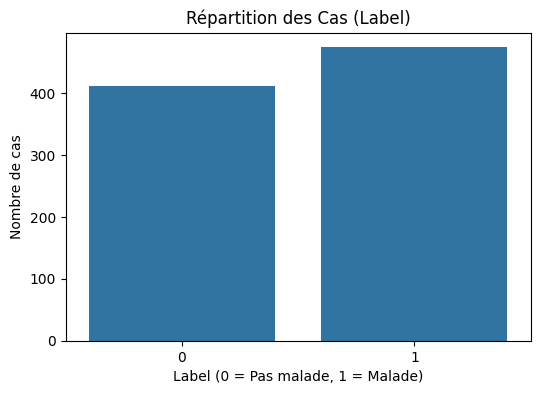

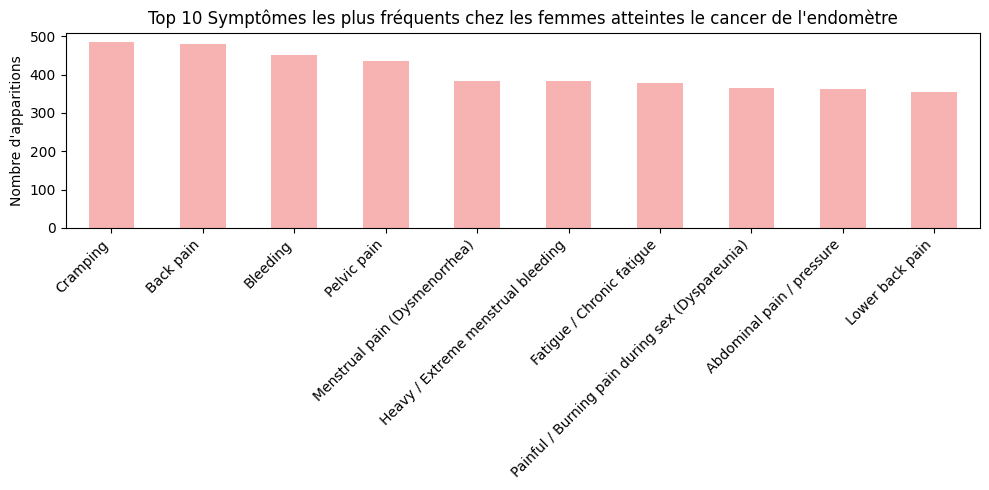

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supprimer colonnes inutiles si elles existent
df = data.drop(columns=[col for col in ['Unnamed: 0', 'row'] if col in data.columns])

df_endometre = df[df['label'] == 1]
# Colonnes de symptômes (toutes sauf 'label')
symptom_columns = df_endometre.columns[df_endometre.columns != 'label']

# Nettoyer : convertir en int, remplacer les erreurs par 0
df[symptom_columns] = df[symptom_columns].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# 1. Distribution du label
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title("Répartition des Cas (Label)")
plt.xlabel("Label (0 = Pas malade, 1 = Malade)")
plt.ylabel("Nombre de cas")
plt.show()

# 2. Top 10 symptômes les plus fréquents
symptom_counts = df[symptom_columns].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
symptom_counts.plot(kind='bar', color='#f7b2b2')
plt.title("Top 10 Symptômes les plus fréquents chez les femmes atteintes le cancer de l'endomètre")
plt.ylabel("Nombre d'apparitions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [3]:
val_cible = data['label'].value_counts()
val_cible

label
1    474
0    412
Name: count, dtype: int64

In [4]:
if

SyntaxError: invalid syntax (4110802630.py, line 1)

In [ ]:
data.shape

(886, 61)

In [ ]:
data.describe()

,Heavy / Extreme menstrual bleeding,Menstrual pain (Dysmenorrhea),Painful / Burning pain during sex (Dyspareunia),Pelvic pain,Irregular / Missed periods,Cramping,Abdominal pain / pressure,Back pain,Painful bowel movements,Nausea,...,Hormonal problems,Bloating,Feeling sick,Decreased energy / Exhaustion,Abdominal Cramps during Intercourse,Insomnia / Sleeplessness,Acne / pimples,Loss of appetite,row,label
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,...,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,0.432280,0.432280,0.413093,0.490971,0.302483,0.547404,0.408578,0.542889,0.295711,0.381490,...,0.257336,0.397291,0.343115,0.376975,0.227991,0.297968,0.250564,0.274266,442.500000,0.534989
std,0.495673,0.495673,0.492667,0.500201,0.459593,0.498029,0.491849,0.498438,0.456619,0.486027,...,0.437413,0.489614,0.475018,0.484902,0.419774,0.457624,0.433583,0.446396,255.910466,0.499056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,221.250000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,442.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.750000,1.000000,663.750000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,885.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 61 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Unnamed: 0                                       886 non-null    object
 1   Heavy / Extreme menstrual bleeding               886 non-null    int64 
 2   Menstrual pain (Dysmenorrhea)                    886 non-null    int64 
 3   Painful / Burning pain during sex (Dyspareunia)  886 non-null    int64 
 4   Pelvic pain                                      886 non-null    int64 
 5   Irregular / Missed periods                       886 non-null    int64 
 6   Cramping                                         886 non-null    int64 
 7   Abdominal pain / pressure                        886 non-null    int64 
 8   Back pain                                        886 non-null    int64 
 9   Painful bowel movements                    

In [ ]:
data.dtypes

Unnamed: 0                                         object
Heavy / Extreme menstrual bleeding                  int64
Menstrual pain (Dysmenorrhea)                       int64
Painful / Burning pain during sex (Dyspareunia)     int64
Pelvic pain                                         int64
                                                    ...  
Insomnia / Sleeplessness                            int64
Acne / pimples                                      int64
Loss of appetite                                    int64
row                                                 int64
label                                               int64
Length: 61, dtype: object

In [ ]:
data.columns

Index(['Unnamed: 0', 'Heavy / Extreme menstrual bleeding',
       'Menstrual pain (Dysmenorrhea)',
       'Painful / Burning pain during sex (Dyspareunia)', 'Pelvic pain',
       'Irregular / Missed periods', 'Cramping', 'Abdominal pain / pressure',
       'Back pain', 'Painful bowel movements', 'Nausea', 'Menstrual clots',
       'Infertility', 'Painful cramps during period', 'Pain / Chronic pain',
       'Diarrhea', 'Long menstruation', 'Constipation / Chronic constipation',
       'Vomiting / constant vomiting', 'Fatigue / Chronic fatigue',
       'Painful ovulation', 'Stomach cramping', 'Migraines',
       'Extreme / Severe pain', 'Leg pain', 'Irritable Bowel Syndrome (IBS)',
       'Syncope (fainting, passing out)', 'Mood swings', 'Depression',
       'Bleeding', 'Lower back pain', 'Fertility Issues', 'Ovarian cysts',
       'Painful urination', 'Headaches', 'Constant bleeding',
       'Pain after Intercourse', 'Digestive / GI problems',
       'IBS-like symptoms', 'Excessive blee

In [ ]:
data.index

RangeIndex(start=0, stop=886, step=1)

In [ ]:
data['row'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
data = data.drop(columns=['Unnamed: 0', 'row'], errors='ignore')
data.head()

,Heavy / Extreme menstrual bleeding,Menstrual pain (Dysmenorrhea),Painful / Burning pain during sex (Dyspareunia),Pelvic pain,Irregular / Missed periods,Cramping,Abdominal pain / pressure,Back pain,Painful bowel movements,Nausea,...,Fever,Hormonal problems,Bloating,Feeling sick,Decreased energy / Exhaustion,Abdominal Cramps during Intercourse,Insomnia / Sleeplessness,Acne / pimples,Loss of appetite,label
0,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,0,0,0,1
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,0,0,1,1
2,0,1,0,1,1,1,0,1,0,1,...,0,0,1,1,1,0,1,0,0,1
3,1,0,0,0,0,1,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0,1,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.isnull().sum()

Heavy / Extreme menstrual bleeding                 0
Menstrual pain (Dysmenorrhea)                      0
Painful / Burning pain during sex (Dyspareunia)    0
Pelvic pain                                        0
Irregular / Missed periods                         0
Cramping                                           0
Abdominal pain / pressure                          0
Back pain                                          0
Painful bowel movements                            0
Nausea                                             0
Menstrual clots                                    0
Infertility                                        0
Painful cramps during period                       0
Pain / Chronic pain                                0
Diarrhea                                           0
Long menstruation                                  0
Constipation / Chronic constipation                0
Vomiting / constant vomiting                       0
Fatigue / Chronic fatigue                     

In [ ]:
data.duplicated().sum()

np.int64(33)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data_cols = data.columns
for col in data_cols : 
    print(f' {col} : {data[col].unique()}')

 Heavy / Extreme menstrual bleeding : [1 0]
 Menstrual pain (Dysmenorrhea) : [1 0]
 Painful / Burning pain during sex (Dyspareunia) : [1 0]
 Pelvic pain : [1 0]
 Irregular / Missed periods : [1 0]
 Cramping : [1 0]
 Abdominal pain / pressure : [1 0]
 Back pain : [1 0]
 Painful bowel movements : [1 0]
 Nausea : [1 0]
 Menstrual clots : [1 0]
 Infertility : [0 1]
 Painful cramps during period : [1 0]
 Pain / Chronic pain : [1 0]
 Diarrhea : [1 0]
 Long menstruation : [1 0]
 Constipation / Chronic constipation : [0 1]
 Vomiting / constant vomiting : [0 1]
 Fatigue / Chronic fatigue : [1 0]
 Painful ovulation : [1 0]
 Stomach cramping : [0 1]
 Migraines : [0 1]
 Extreme / Severe pain : [0 1]
 Leg pain : [1 0]
 Irritable Bowel Syndrome (IBS) : [1 0]
 Syncope (fainting, passing out) : [0 1]
 Mood swings : [1 0]
 Depression : [1 0]
 Bleeding : [1 0]
 Lower back pain : [1 0]
 Fertility Issues : [0 1]
 Ovarian cysts : [0 1]
 Painful urination : [0 1]
 Headaches : [1 0]
 Constant bleeding : [0 1

In [ ]:
# Renommer la colonne
data.rename(columns={'label': 'endometrial cancer'}, inplace=True)

In [ ]:
data.shape

(853, 59)

In [ ]:
data['endometrial cancer'].unique()

array([1, 0])

In [ ]:
val_cible = data['endometrial cancer'].value_counts()
val_cible

endometrial cancer
1    468
0    385
Name: count, dtype: int64

In [ ]:
data.dtypes

Heavy / Extreme menstrual bleeding                 int64
Menstrual pain (Dysmenorrhea)                      int64
Painful / Burning pain during sex (Dyspareunia)    int64
Pelvic pain                                        int64
Irregular / Missed periods                         int64
Cramping                                           int64
Abdominal pain / pressure                          int64
Back pain                                          int64
Painful bowel movements                            int64
Nausea                                             int64
Menstrual clots                                    int64
Infertility                                        int64
Painful cramps during period                       int64
Pain / Chronic pain                                int64
Diarrhea                                           int64
Long menstruation                                  int64
Constipation / Chronic constipation                int64
Vomiting / constant vomiting   

### Analyse de corrélation

Pourquoi  ?
Identifier les variables redondantes (très corrélées entre elles) : ressemblent trop (ex : poids et BMI)

Éviter le sur-apprentissage en supprimant les variables redondantes :  trop similaires.

Sélectionner les meilleures variables pour entraîner un modèle performant

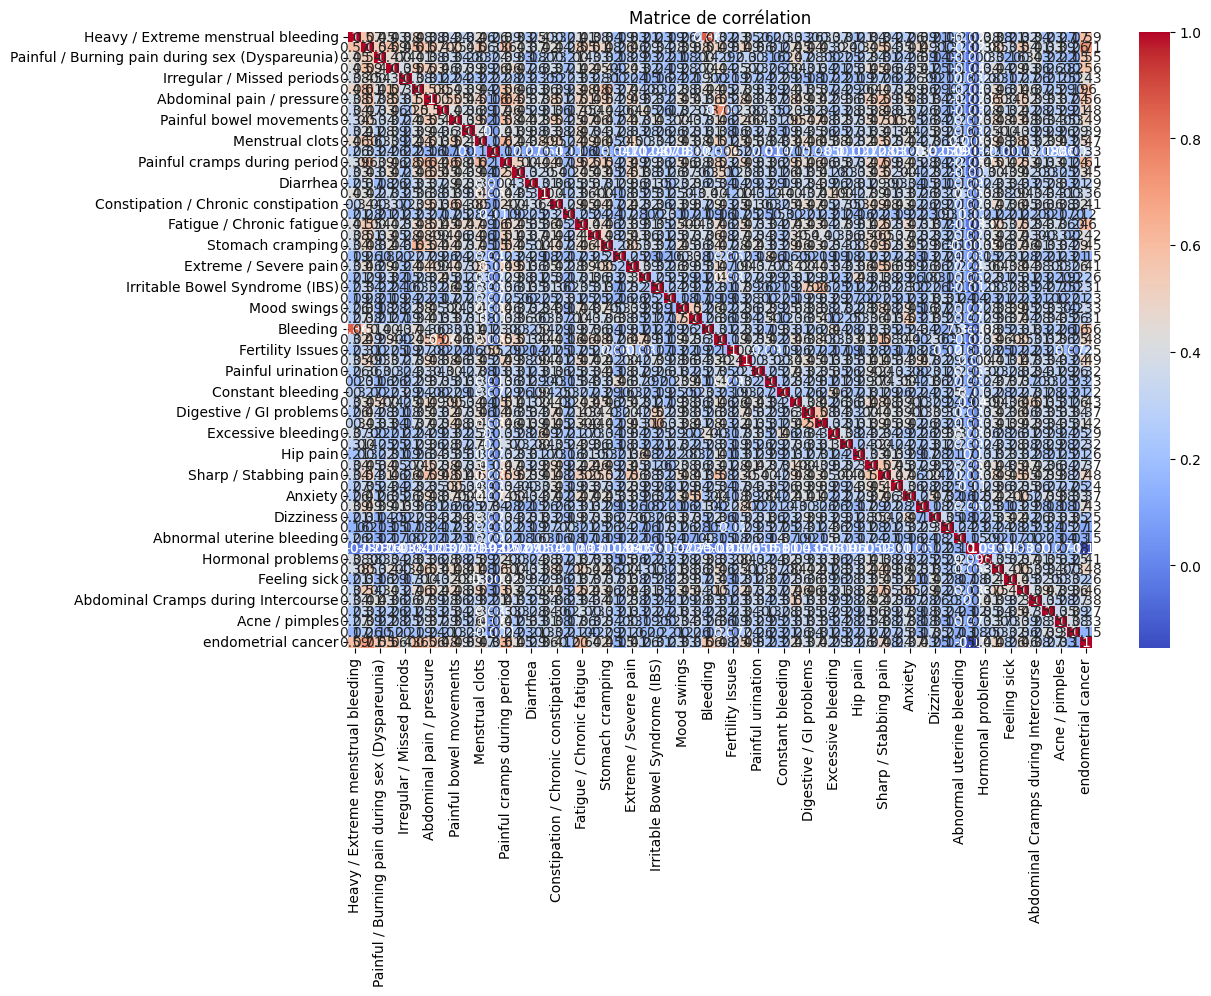

In [ ]:
# 1) Identifier les variables redondantes (très corrélées entre elles)
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de corrélation
corr_matrix = data.corr()

# Affichage visuel
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


### Supprimer les variables fortement corrélées

In [ ]:
# 2) Éviter le sur-apprentissage en supprimant les variables trop similaires
# Supprimer une des deux variables très corrélées (> 0.85)
# On crée une liste des colonnes à supprimer

to_drop = set()
threshold = 0.85

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

print("Variables à supprimer :", to_drop)

# Suppression des colonnes sélectionnées
df_cleaned = data.drop(columns=to_drop)

Variables à supprimer : {'Bleeding'}


In [ ]:
df_cleaned.columns

Index(['Heavy / Extreme menstrual bleeding', 'Menstrual pain (Dysmenorrhea)',
       'Painful / Burning pain during sex (Dyspareunia)', 'Pelvic pain',
       'Irregular / Missed periods', 'Cramping', 'Abdominal pain / pressure',
       'Back pain', 'Painful bowel movements', 'Nausea', 'Menstrual clots',
       'Infertility', 'Painful cramps during period', 'Pain / Chronic pain',
       'Diarrhea', 'Long menstruation', 'Constipation / Chronic constipation',
       'Vomiting / constant vomiting', 'Fatigue / Chronic fatigue',
       'Painful ovulation', 'Stomach cramping', 'Migraines',
       'Extreme / Severe pain', 'Leg pain', 'Irritable Bowel Syndrome (IBS)',
       'Syncope (fainting, passing out)', 'Mood swings', 'Depression',
       'Lower back pain', 'Fertility Issues', 'Ovarian cysts',
       'Painful urination', 'Headaches', 'Constant bleeding',
       'Pain after Intercourse', 'Digestive / GI problems',
       'IBS-like symptoms', 'Excessive bleeding', 'Anaemia / Iron deficiency

In [ ]:
df_cleaned.shape

(853, 58)

In [ ]:
data = df_cleaned

## Modélisation 

### 1) Division de données en : Données d'entrées (Input) et Données de Sorties (Output)

In [ ]:
import numpy as np 
x= data.drop('endometrial cancer' , axis=1) 
x_list = list(x.columns)
x =np.array(x)
y= np.array(data['endometrial cancer'])

print(x_list)
print(x)
print(y)

['Heavy / Extreme menstrual bleeding', 'Menstrual pain (Dysmenorrhea)', 'Painful / Burning pain during sex (Dyspareunia)', 'Pelvic pain', 'Irregular / Missed periods', 'Cramping', 'Abdominal pain / pressure', 'Back pain', 'Painful bowel movements', 'Nausea', 'Menstrual clots', 'Infertility', 'Painful cramps during period', 'Pain / Chronic pain', 'Diarrhea', 'Long menstruation', 'Constipation / Chronic constipation', 'Vomiting / constant vomiting', 'Fatigue / Chronic fatigue', 'Painful ovulation', 'Stomach cramping', 'Migraines', 'Extreme / Severe pain', 'Leg pain', 'Irritable Bowel Syndrome (IBS)', 'Syncope (fainting, passing out)', 'Mood swings', 'Depression', 'Lower back pain', 'Fertility Issues', 'Ovarian cysts', 'Painful urination', 'Headaches', 'Constant bleeding', 'Pain after Intercourse', 'Digestive / GI problems', 'IBS-like symptoms', 'Excessive bleeding', 'Anaemia / Iron deficiency', 'Hip pain', 'Vaginal Pain/Pressure', 'Sharp / Stabbing pain', 'Bowel pain', 'Anxiety', 'Cysts 

### 2) Division de données en : Données d'Apprentissage (Data Training : 90%) et Données de Test (Data Testing : 10%)

In [ ]:
data.shape

(853, 58)

In [ ]:
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.1, random_state=40)

print('Training Data x : ' , x_train.shape)
print('Training Data y: ' , y_train.shape)
print('Testing Data x' , x_test.shape)
print('Testing Data y : ' , y_test.shape)


Training Data x :  (767, 57)
Training Data y:  (767,)
Testing Data x (86, 57)
Testing Data y :  (86,)


In [ ]:
from sklearn.utils import shuffle

x_test, y_test = shuffle(x_test, y_test, random_state=42)

x_final_test= x_test[:5]
y_final_test = y_test[:5]

x_test= x_test[5:]
y_test = y_test[5:]

print("Testing Data:", x_test.shape, y_test.shape)
print("Final Testing Data:", x_final_test.shape, y_final_test.shape)
print(y_final_test) 

Testing Data: (81, 57) (81,)
Final Testing Data: (5, 57) (5,)
[1 1 1 0 0]


### 3) Comparaison des algorithmes de Machine Learning : 
* Gradient Boosting 
* XGBoost
* Random Forest

on Choisit des Algorithmes de classification comme (Gradient Boosting classifier - XGBoost classifier - Random Forest classifier) car : 
on a un probléme de classification puisque la variable cible (Target) est catégorielle  

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score , roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#### a) Gradient Boosting

##### * Créer et Entraîner le modéle

In [ ]:
# Créer le modèle Gradient Boosting

#Avant GridSearch 
model_gradientBoosting = GradientBoostingClassifier(

    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
    
)
#Aprés GridSearch 
# model_gradientBoosting = GradientBoostingClassifier(
#     n_estimators=100, 
#     learning_rate=0.1, 
#     max_depth=3, 
#     random_state=42,
#     min_samples_split= 2,
#     subsample= 0.7
# )


# Entraîner le modèle
model_gradientBoosting.fit(x_train, y_train)

# Prédiction
y_pred = model_gradientBoosting.predict(x_test)

##### * Évaluer la performance du modèle par le calcul des métriques d'évaluation

##### -- Matrice de confusion

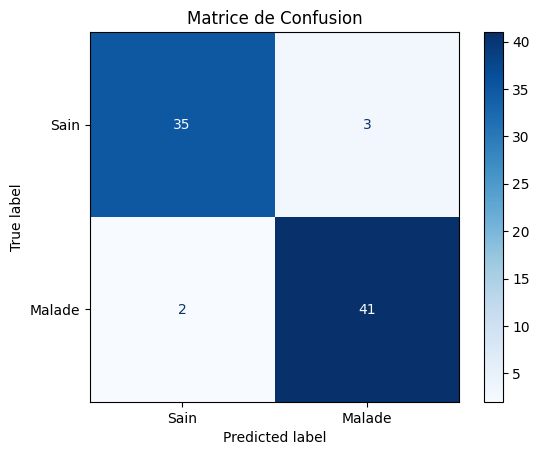

In [ ]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sain", "Malade"])
# Afficher la matrice de confusion avec un graphique
disp.plot(cmap="Blues")
plt.title('Matrice de Confusion')
# Afficher le graphique
plt.show()

##### -- Métriques :
* Accuracy
* Recall
* Precision
* F1-Score
* AUC-ROC

In [ ]:
# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
auc_roc = roc_auc_score(y_test, y_pred)

# Afficher les résultats
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1-Score: {f1}')
print(f'AUC-ROC: {auc_roc}') 

#Avant GridSearch 


#Aprés GridSearch 



Accuracy: 0.9382716049382716
Recall: 0.9534883720930233
Precision: 0.9318181818181818
F1-Score: 0.9425287356321839
AUC-ROC: 0.9372705018359853


##### -- Courbe ROC-AUC 

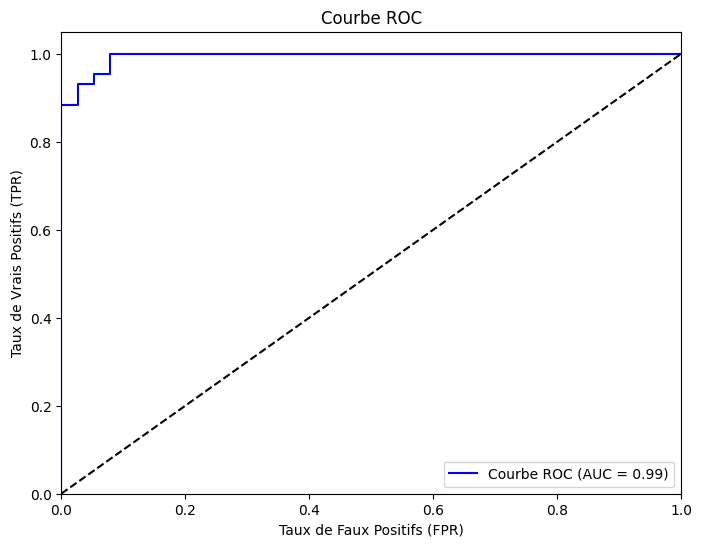

In [ ]:
y_pred_prob = model_gradientBoosting.predict_proba(x_test)[:, 1]  # Probabilité de la classe positive
# Calculer les courbes ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)  # y_pred_prob = probabilité de la classe positive
roc_auc = auc(fpr, tpr)  # Calculer l'AUC

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale aléatoire (ligne de hasard)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

#### b) XGBoost

##### * Créer et Entraîner le modéle

In [ ]:
# Créer le modèle XGBoost

#Avant GridSearch
# model_xgboost = xgb.XGBClassifier(
#    n_estimators =100 ,
#    learning_rate=0.1 , 
#    max_depth=3 , 
#    random_state=42
# )
#Aprés GridSearch 
# model_xgboost = xgb.XGBClassifier(
#   colsample_bytree = 1.0,
#   gamma = 0.1,
#   learning_rate = 0.1,
#   max_depth = 3,
#   n_estimators = 100,
#   subsample = 0.7, 
#   random_state=42
# )

model_xgboost = xgb.XGBClassifier(
    
    colsample_bytree = 0.8,
    gamma = 0.2,
    learning_rate = 0.05,
    max_depth = 4,
    n_estimators = 200,
    subsample = 0.8, 
    random_state=42
)


# Entraîner le modèle
model_xgboost.fit(x_train, y_train)

# Prédiction
y_pred = model_xgboost.predict(x_test)


##### * Évaluer la performance du modèle par le calcul des métriques d'évaluation

##### -- Matrice de confusion

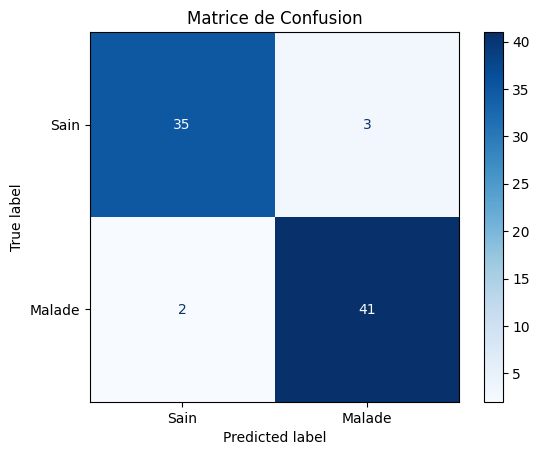

In [ ]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sain", "Malade"])
# Afficher la matrice de confusion avec un graphique
disp.plot(cmap="Blues")
plt.title('Matrice de Confusion')
# Afficher le graphique
plt.show()

##### -- Métriques :
* Accuracy
* Recall
* Precision
* F1-Score
* AUC-ROC

In [ ]:
# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
auc_roc = roc_auc_score(y_test, y_pred)

# Afficher les résultats
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1-Score: {f1}')
print(f'AUC-ROC: {auc_roc}') 

#Avant GridSearch



# Aprés GridSearch



Accuracy: 0.9382716049382716
Recall: 0.9534883720930233
Precision: 0.9318181818181818
F1-Score: 0.9425287356321839
AUC-ROC: 0.9372705018359853


### Sélection des meilleures variables (feature selection)

pour entraîner ton modèle juste avec les colonnes utiles.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

def val_importance(model, feature_names, top_n=30):

    """Affiche et retourne les top N features les plus importantes du modèle XGBoost."""

    importance_val = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_val})
    feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

    # Affichage graphique
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_r')
    plt.title("Les Features (Caractéristiques) Importantes")
    plt.xlabel("Valeur d'Importance")
    plt.ylabel("Features (Caractéristiques)")
    plt.show()

    # Top N
    top_features_df = feature_importance_df.head(top_n)
    print(f"Top {top_n} caractéristiques les plus importantes :\n")
    print(top_features_df)

    # Retourner la liste des noms des top features
    return top_features_df['Feature'].tolist()


C:\Users\DELL\AppData\Local\Temp\ipykernel_15688\2136049951.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_r')


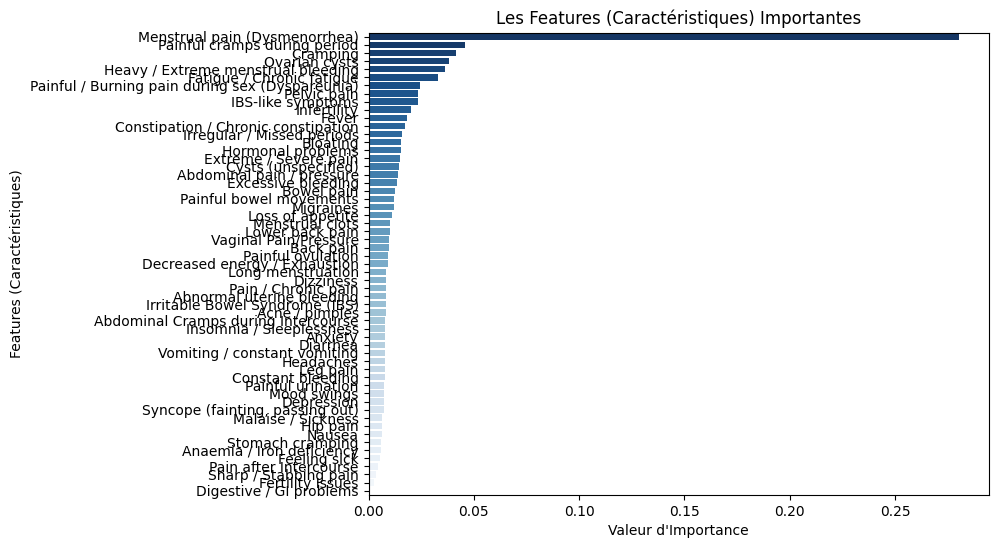

Top 30 caractéristiques les plus importantes :

                                            Feature  Importance
1                     Menstrual pain (Dysmenorrhea)    0.280360
12                     Painful cramps during period    0.045610
5                                          Cramping    0.041585
30                                    Ovarian cysts    0.038007
0                Heavy / Extreme menstrual bleeding    0.036302
18                        Fatigue / Chronic fatigue    0.033111
2   Painful / Burning pain during sex (Dyspareunia)    0.024447
3                                       Pelvic pain    0.023484
36                                IBS-like symptoms    0.023323
11                                      Infertility    0.020049
48                                            Fever    0.018492
16              Constipation / Chronic constipation    0.017269
4                        Irregular / Missed periods    0.015733
50                                         Bloating    0

In [ ]:
# Si x_train est un ndarray, convertis-le en DataFrame
x_train = pd.DataFrame(x_train, columns=x_list)
x_test = pd.DataFrame(x_test, columns=x_list)

# Étape 1 : Entraînement initial
# model_xgboost = xgb.XGBClassifier(
#   colsample_bytree=1.0,
#   gamma=0.1,
#   learning_rate=0.1,
#   max_depth=3,
#   n_estimators=100,
#   subsample=0.7, 
#   random_state=42
# )
# model_xgboost.fit(x_train, y_train)

# Étape 2 : Obtenir les top features
top_features_list = val_importance(model_xgboost, x_train.columns)

# Étape 3 : Sélectionner les données avec les top features
x_train_top_features = x_train[top_features_list]
x_test_top_features = x_test[top_features_list]


# Étape 4 : Réentraîner le modèle avec les top features
model_xgboost_top = xgb.XGBClassifier(
  colsample_bytree=1.0,
  gamma=0.1,
  learning_rate=0.1,
  max_depth=3,
  n_estimators=100,
  subsample=0.7, 
  random_state=42
)
model_xgboost_top.fit(x_train_top_features, y_train)

# Étape 5 : Prédiction et évaluation
y_pred = model_xgboost_top.predict(x_test_top_features)


# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
auc_roc = roc_auc_score(y_test, y_pred)

# Afficher les résultats
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1-Score: {f1}')
print(f'AUC-ROC: {auc_roc}') 


In [ ]:
if

SyntaxError: invalid syntax (4110802630.py, line 1)

##### -- Courbe ROC-AUC

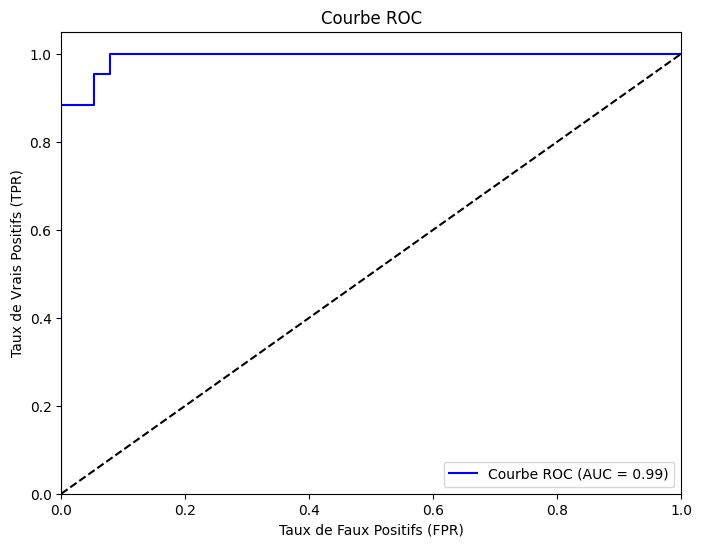

In [ ]:
y_pred_prob = model_xgboost  .predict_proba(x_test)[:, 1]  # Probabilité de la classe positive
# Calculer les courbes ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)  # y_pred_prob = probabilité de la classe positive
roc_auc = auc(fpr, tpr)  # Calculer l'AUC

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale aléatoire (ligne de hasard)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

#### c) Random Forest

##### * Créer et Entraîner le modéle

In [ ]:
# Créer le modèle Random Forest

#Avant GridSearch
model_randomForest = RandomForestClassifier(

    n_estimators=100, 
    max_depth=5, 
    random_state=42
    
    )
# Aprés GridSearch
# model_randomForest = RandomForestClassifier(
#      max_depth = 10,
#      max_features = 'log2',
#      min_samples_leaf = 1,
#      min_samples_split = 2,
#      n_estimators = 100
#     )

# Entraîner le modèle
model_randomForest.fit(x_train, y_train)

# Prédiction
y_pred = model_randomForest.predict(x_test)

##### * Évaluer la performance du modèle par le calcul des métriques d'évaluation

##### -- Matrice de confusion

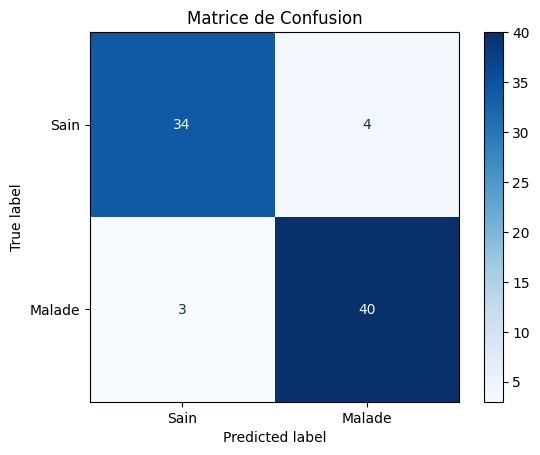

In [ ]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sain", "Malade"])
# Afficher la matrice de confusion avec un graphique
disp.plot(cmap="Blues")
plt.title('Matrice de Confusion')
# Afficher le graphique
plt.show()

##### -- Métriques :
* Accuracy
* Recall
* Precision
* F1-Score
* AUC-ROC

In [ ]:
# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
auc_roc = roc_auc_score(y_test, y_pred)

# Afficher les résultats
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1-Score: {f1}')
print(f'AUC-ROC: {auc_roc}') 

#Avant GridSearch 


#Aprés GridSearch


Accuracy: 0.9135802469135802
Recall: 0.9302325581395349
Precision: 0.9090909090909091
F1-Score: 0.9195402298850575
AUC-ROC: 0.9124847001223989


##### -- Courbe ROC-AUC

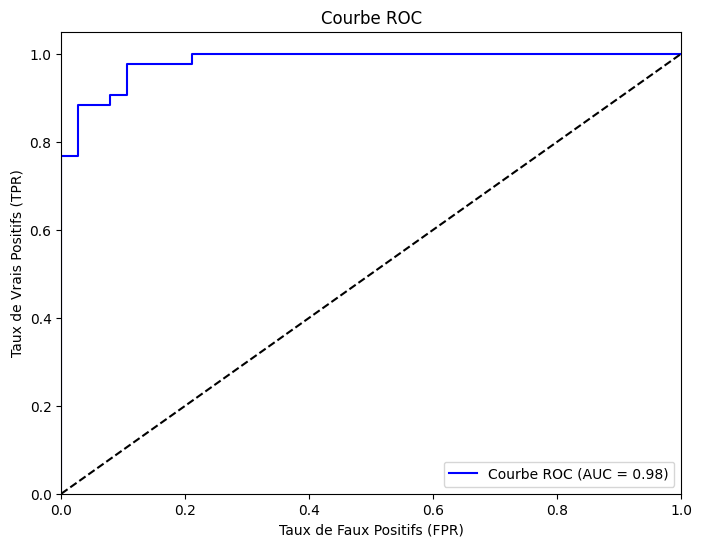

In [ ]:
y_pred_prob = model_randomForest.predict_proba(x_test)[:, 1]  # Probabilité de la classe positive
# Calculer les courbes ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)  # y_pred_prob = probabilité de la classe positive
roc_auc = auc(fpr, tpr)  # Calculer l'AUC

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale aléatoire (ligne de hasard)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

### 4) Optimisation des Hyperparamètres avec GridSearchCV pour améliorer la Performance du Modèle

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Définir les modèles
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Définir les grilles de paramètres pour chaque modèle
param_grids = {
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.7, 1.0],
        'min_samples_split': [2, 5]
    },
    "XGBoost": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.7, 0.9],
        'colsample_bytree': [0.7, 1.0],
        'gamma': [0, 0.1]
    },
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    }
}

# Fonction pour exécuter GridSearchCV, faire la prédiction et afficher les métriques
def run_grid_search(models, param_grids, x_train, y_train, x_test, y_test):
    results = {}
    for model_name, model in models.items():
        print(f"\nOptimisation de {model_name} : ")
        
        # GridSearchCV avec les paramètres spécifiés
        grid_search = GridSearchCV(model, param_grids[model_name], cv=3, n_jobs=-1, verbose=2)
        grid_search.fit(x_train, y_train)
        
        # Stocker les résultats
        best_model = grid_search.best_estimator_
        results[model_name] = {
            'Best Params': grid_search.best_params_,
            'Best Score': grid_search.best_score_,
            'Best Model': best_model
        }
        
        # Afficher les meilleurs hyperparamètres pour chaque modèle
        print(f"Meilleurs paramètres pour {model_name}:")
        for param, value in grid_search.best_params_.items():
            print(f"{param} = {value}")
        
        print(f"Meilleure précision (cross-validation) pour {model_name}: {grid_search.best_score_:.4f}")
        
        # Faire la prédiction avec le meilleur modèle
        y_pred = best_model.predict(x_test)
        y_pred_proba = best_model.predict_proba(x_test)[:, 1]  # Probabilités pour AUC-ROC
        
        # Calcul des métriques sur le test set
        test_accuracy = accuracy_score(y_test, y_pred)
        test_recall = recall_score(y_test, y_pred, average='macro')
        test_precision = precision_score(y_test, y_pred, average='macro')
        test_f1 = f1_score(y_test, y_pred, average='macro')
        test_auc_roc = roc_auc_score(y_test, y_pred_proba)

        print(f"\nÉvaluation sur le test set de {model_name} :")
        print(f"  Accuracy  : {test_accuracy}")
        print(f"  Recall    : {test_recall}")
        print(f"  Précision : {test_precision}")
        print(f"  F1-Score  : {test_f1}")
        print(f"  AUC-ROC   : {test_auc_roc}\n")
    
    return results

results = run_grid_search(models, param_grids, x_train, y_train, x_test, y_test)



Optimisation de Gradient Boosting : 
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Meilleurs paramètres pour Gradient Boosting:
learning_rate = 0.1
max_depth = 3
min_samples_split = 2
n_estimators = 100
subsample = 1.0
Meilleure précision (cross-validation) pour Gradient Boosting: 0.9205

Évaluation sur le test set de Gradient Boosting :
  Accuracy  : 0.9382716049382716
  Recall    : 0.9372705018359853
  Précision : 0.9388820638820639
  F1-Score  : 0.9379310344827586
  AUC-ROC   : 0.9938800489596082


Optimisation de XGBoost : 
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Meilleurs paramètres pour XGBoost:
colsample_bytree = 0.7
gamma = 0
learning_rate = 0.1
max_depth = 5
n_estimators = 100
subsample = 0.9
Meilleure précision (cross-validation) pour XGBoost: 0.9244

Évaluation sur le test set de XGBoost :
  Accuracy  : 0.9382716049382716
  Recall    : 0.9372705018359853
  Précision : 0.9388820638820639
  F1-Score  : 0.9379310344827586
  AUC-ROC   : 0.99

### 4) Comparaison avec l'algorithme de Deep Learning : 
* Réseau de Neurones artificiels (ANN : Artificial Neural Network)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# 1 Prétraitement des données (standardisation)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 2 Construction du modèle ANN
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),  # Couche d'entrée     (32 →  64 →  128)
    Dropout(0.3),  # Pour éviter l'overfitting   entre 0.2 et 0.5 # Trop de dropout (ex: 0.5) peut réduire l’apprentissage  -  Trop peu (ex: 0.1) peut ne pas suffire à régulariser
    Dense(32, activation='relu'),  # Couche cachée Réduire progressivement les neurones (128 → 64 → 32) permet une bonne extraction des features
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Couche de sortie (classification binaire)
])

# 3 Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping pour éviter l'overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Trop peu d’epochs (ex: 10-20) → le modèle n’a pas le temps d’apprendre suffisamment - Trop d’epochs (ex: 100-200) → risque d’overfitting (le modèle apprend trop sur les données d’entraînement mais généralise mal).
# 4 Entraînement du modèle
model.fit(x_train_scaled, y_train, epochs=80, batch_size=64, validation_data=(x_test_scaled, y_test), verbose=1)
# Petit batch (ex: 8-16) → plus précis mais plus lent  - Grand batch (ex: 64-256) → plus rapide mais moins bon en généralisation - Tester 16 ou 64

# 5 Évaluation du modèle
y_pred_proba = model.predict(x_test_scaled)  # Probabilités
y_pred = (y_pred_proba > 0.5).astype(int)  # Seuil à 0.5 pour la classification

# 6 Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

# 7 Affichage des résultats
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1-Score: {f1}')
print(f'AUC-ROC: {auc_roc}')


Epoch 1/80


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5926 - loss: 0.6464 - val_accuracy: 0.8519 - val_loss: 0.4538
Epoch 2/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8452 - loss: 0.4350 - val_accuracy: 0.8519 - val_loss: 0.3092
Epoch 3/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8692 - loss: 0.3168 - val_accuracy: 0.8642 - val_loss: 0.2556
Epoch 4/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8771 - loss: 0.2777 - val_accuracy: 0.8889 - val_loss: 0.2025
Epoch 5/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9027 - loss: 0.2131 - val_accuracy: 0.9506 - val_loss: 0.1450
Epoch 6/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9190 - loss: 0.1985 - val_accuracy: 0.9506 - val_loss: 0.1203
Epoch 7/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9442 - loss: 0.1517 - val_accuracy: 0.9877 - val_loss: 0.0904
Epoch 8/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9521 - loss: 0.1423 - val_accuracy: 0.9630 - val_loss: 0.0816
E

### 5) Test réel du modèle choisi : XGBoost

In [ ]:
y_final_pred = model_xgboost.predict(x_final_test)
print(f'Rélle : {y_final_test}')
print( f'Prédiction : {y_final_pred}')

Rélle : [1 1 1 0 0]
Prédiction : [1 0 1 0 0]


In [ ]:
# y_final_pred = model.predict(x_final_test)
# print(f'Rélle : {y_final_test}')
# print( f'Prédiction : {y_final_pred}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Rélle : [1 1 1 0 0]
Prédiction : [[1.        ]
 [0.9999458 ]
 [1.        ]
 [0.9372951 ]
 [0.99999994]]


In [ ]:
# Assurez-vous que x_final_test a les bonnes colonnes (mêmes que top_features_list)
x_final_test = pd.DataFrame(x_final_test, columns=x_list)  # si nécessaire
x_final_test_top = x_final_test[top_features_list]

# Prédiction finale
y_final_pred = model_xgboost_top.predict(x_final_test_top)


print(f'Rélle : {y_final_test}')
print( f'Prédiction : {y_final_pred}')

Rélle : [1 1 1 0 0]
Prédiction : [1 0 1 0 0]


### 6) Sauvegarde du modèle choisi : XGBoost

In [ ]:
import pickle

In [ ]:
# with open ('cancer_endometre_xgboost.pkl', 'wb' ) as file :
#      pickle.dump(model_xgboost , file)

In [ ]:
with open ('cancer_endometre_xgboost_top.pkl', 'wb' ) as file :
     pickle.dump(model_xgboost_top , file)

In [ ]:
# model.save("cancer_endometre_ann.h5")

In [ ]:
# with open ('cancer_endometre_xgboost.pkl', 'rb' ) as file : 
#     cancer_endometre_xgboost = pickle.load(file)